cuda
Train Size = 215


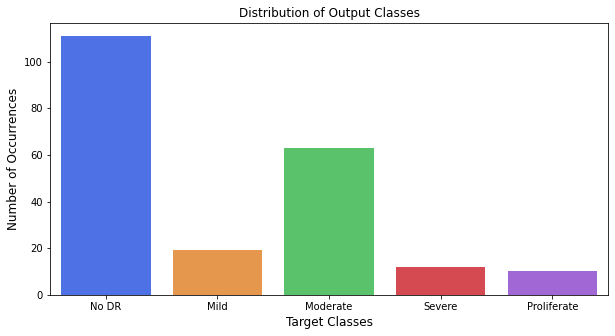

tensor([0.3874, 2.2632, 0.6825, 3.5833, 4.3000], device='cuda:0')
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           9,408
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 6

<Figure size 864x864 with 0 Axes>

In [84]:
import numpy as np 
import pandas as pd 


# In[49]:


import os
import tensorflow as tf


# In[50]:


# for dirname, _, filenames in os.walk('C:/Users/SrinivasRao-Bio/Desktop/New_IP/Train_images'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# In[51]:


import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting


# In[52]:


from PIL import Image
import cv2


# In[53]:


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torch.optim as optim
import torchvision.models as models # Pre-Trained models


# In[54]:


from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer


# In[55]:


import pandas as pd
import numpy as np
import itertools
import os
import sys
import pickle
from random import shuffle
from sklearn.model_selection import train_test_split
import multiprocessing
from multiprocessing.pool import ThreadPool
from tqdm import tqdm_notebook


# In[56]:


import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False


# In[57]:


import sklearn
from sklearn.metrics import cohen_kappa_score, accuracy_score


# In[58]:


import time
import os
from tqdm import tqdm_notebook


# In[59]:


import pickle
from random import shuffle
from sklearn.model_selection import train_test_split
import multiprocessing
from multiprocessing.pool import ThreadPool
from tqdm import tqdm_notebook

from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

import tensorflow.keras as keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation,BatchNormalization,GlobalMaxPooling2D,concatenate,Flatten
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,Callback
from keras.initializers import random_normal
from keras.models import load_model
from keras.losses import binary_crossentropy,categorical_crossentropy,mean_squared_error
from keras import backend as K


# In[60]:


from PIL import Image
import cv2
import tensorflow as tf


# In[61]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Use GPU if it's available or else use CPU.
print(device)


# In[62]:


import os




# In[63]:


data = pd.read_csv('/content/Train.csv')
print('Train Size = {}'.format(len(data)))
data.head()


# In[64]:


counts = data['diagnosis'].value_counts()
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferate']
for i,x in enumerate(class_list):
    counts[x] = counts.pop(i)

plt.figure(figsize=(10,5))
sns.barplot(x=counts.index, y=counts.values, alpha=0.8, palette='bright')
plt.title('Distribution of Output Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target Classes', fontsize=12)
plt.show()


# In[65]:


from sklearn.utils import class_weight #For calculating weights for each class.
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.array([0,1,2,3,4]),y=data['diagnosis'].values)
class_weights = torch.tensor(class_weights,dtype=torch.float).cuda()
 
print(class_weights)


# In[66]:


fig = plt.figure(figsize=(12, 12))
# display random 16 images
train_imgs = os.listdir("images")

# In[67]:


import sys


# In[68]:


class dataset(Dataset):
    def __init__(self,df,data_path,image_transform=None, train=True):
        super(Dataset,self).__init__()
        self.df = df
        self.data_path = data_path
        self.image_transform = image_transform
        self.train = train
    def __len__(self):
        return len(self.df)
    def __getitem__(self,index):
        image_id = self.df['id_code'][index]
        image = Image.open(f'{self.data_path}/{image_id}.png')
        if self.image_transform :
            image = self.image_transform(image)
        if self.train :
            label = self.df['diagnosis'][index]
            return image,label
        else:
            return image
        


# In[69]:


image_transform = transforms.Compose([transforms.Resize([512,512]),
                                    transforms.ToTensor(),
                                      torchvision.transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) #Transformations to apply to the image.
data_set = dataset(data,'images',image_transform=image_transform)

#Split the data_set so that valid_set contains 0.1 samples of the data_set. 
train_set,valid_set = torch.utils.data.random_split(data_set,[172,43],generator=torch.Generator().manual_seed(42))


# In[70]:


train_dataloader = DataLoader(train_set,batch_size=32,shuffle=True)
valid_dataloader = DataLoader(valid_set,batch_size=32,shuffle=False)


# In[71]:


model = models.resnet34(pretrained=True)

model.fc = nn.Sequential(nn.Linear(512,256), nn.Dropout(p=0.2), nn.
                        Linear(256,128), nn.Dropout(p=0.5), nn.Linear(128,64), nn.Linear(64,5))
model = model.to(device)


# In[72]:


from torchsummary import summary


# In[73]:



summary(model, (3, 320, 320))

In [85]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
nb_epochs = 45
train_losses, valid_losses, train_acc, valid_acc = optimize(train_dataloader,valid_dataloader,model,loss_fn,optimizer,nb_epochs)


Epoch 1/45
------------------------------

Training Loss per Batch = 1.728108	Accuracy on Training Set = 5.813953% [10/172]

Valid Loss per Batch = 1.741970	Accuracy on Validation Set = 6.976744% [3/43]

Epoch 2/45
------------------------------

Training Loss per Batch = 1.673336	Accuracy on Training Set = 6.976744% [12/172]

Valid Loss per Batch = 1.683653	Accuracy on Validation Set = 6.976744% [3/43]

Epoch 3/45
------------------------------

Training Loss per Batch = 1.646021	Accuracy on Training Set = 11.046512% [19/172]

Valid Loss per Batch = 1.625502	Accuracy on Validation Set = 6.976744% [3/43]

Epoch 4/45
------------------------------

Training Loss per Batch = 1.601009	Accuracy on Training Set = 15.697674% [27/172]

Valid Loss per Batch = 1.586779	Accuracy on Validation Set = 16.279070% [7/43]

Epoch 5/45
------------------------------

Training Loss per Batch = 1.554554	Accuracy on Training Set = 29.651163% [51/172]

Valid Loss per Batch = 1.544633	Accuracy on Validation

In [86]:
import matplotlib.pyplot as plt
from scipy import stats
import random
from torchsummary import summary

In [89]:
# models.save_model( model,"resnet34_model.h5")

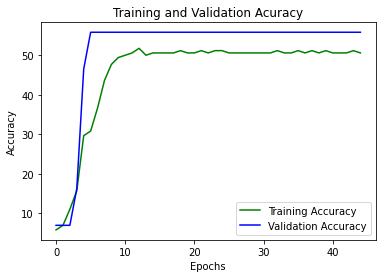

In [90]:
epochs = range(45)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Acuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

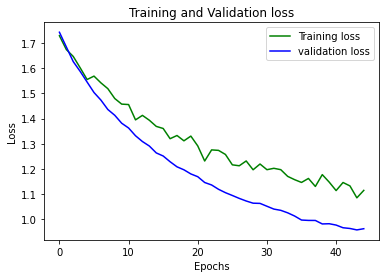

In [91]:
epochs = range(45)
plt.plot(epochs, train_losses, 'g', label='Training loss')
plt.plot(epochs, valid_losses, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
model.eval()
results = []

i = 0
j = 0
k = 0
l = 0
m = 0
for x,y in DataLoader(data_set):
    if(y.numpy()[0] == 0 and i<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        i = i+1
    if(y.numpy()[0] == 1 and j<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        j = j+1
    if(y.numpy()[0] == 2 and k<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        k = k+1
    if(y.numpy()[0] == 3 and l<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        l = l+1
    if(y.numpy()[0] == 4 and m<20):
        result = model(x.to(device)).argmax(dim=1).cpu().detach()
        results.append((result.numpy()[0], y.numpy()[0]))
        m = m+1
    if(i+j+k+l+m >= 100):
        break

In [127]:
i,j,k,l,m

(20, 19, 20, 12, 10)

In [93]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [128]:
labelis = [val[1] for val in results]
predis = [val[0] for val in results]

count = 0
for x,y in results:
    if x == y:
        count += 1
cm = confusion_matrix(labelis, predis, labels = [0, 1, 2, 3, 4])
print('accuracy', 100*(count)/len(predis))
cm

accuracy 24.691358024691358


array([[20,  0,  0,  0,  0],
       [19,  0,  0,  0,  0],
       [20,  0,  0,  0,  0],
       [12,  0,  0,  0,  0],
       [10,  0,  0,  0,  0]])

In [95]:
cm_df = pd.DataFrame(cm,
                    index = ['0', '1', '2', '3', '4'],
                    columns = ['0', '1', '2', '3', '4'])
cm_df

,0,1,2,3,4
0,20,0,0,0,0
1,19,0,0,0,0
2,20,0,0,0,0
3,12,0,0,0,0
4,10,0,0,0,0


In [96]:
total = sum(cm_df.sum(axis = 1))

In [130]:
arr = np.array(cm_df)
cnfm = []
for i in range(0,5):
    TP = arr[:][i][i]
    FN = sum(arr[:][i]) - arr[:][i][i]
    FP = cm_df.sum(axis=0)[i] - arr[:][i][i]
    TN = total - TP
    precision = TP / (TP+FP)
    recall = TP / (TP+FN)
    f1 = 2*precision*recall/(precision+recall)
   
    cnfm.append([i, TP,FN,FP,TN, precision, recall,f1])
f1_result = pd.DataFrame(cnfm, columns = ['severity', 'True Positive', 'False Negative', 'False Possitive', 'True Negative', 'Precision', 'Recall', 'F1-score'])
f1_result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


,severity,True Positive,False Negative,False Possitive,True Negative,Precision,Recall,F1-score
0,0,20,0,61,61,0.246914,1.0,0.39604
1,1,0,19,0,81,NaN,0.0,NaN
2,2,0,20,0,81,NaN,0.0,NaN
3,3,0,12,0,81,NaN,0.0,NaN
4,4,0,10,0,81,NaN,0.0,NaN


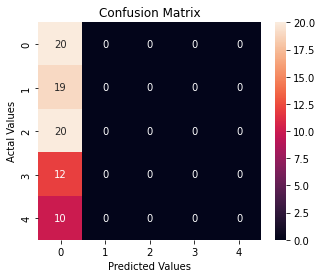

In [131]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc

def test_class_probabilities(model, test_loader):
    model.eval()
    actuals = []
    probabilities = []
    i = 0
    j = 0
    k = 0
    l = 0
    f = 0
    with torch.no_grad():
        for x, y in test_loader:
          y = y.numpy()[0]
          outputs = model(x.to(device))
          prediction = outputs.argmax(dim=1, keepdim=True).cpu().detach()
          # if (prediction.numpy()[0] == y):
          if (y == 0 and i<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            i = i+1
          if (y == 1 and j<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            j = j+1
          if (y == 2 and k<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            k = k+1
          if (y == 3 and l<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            l = l+1
          if (y == 4 and f<10):
            actuals.append(y)
            values = outputs.cpu().detach().numpy()[0]
            m = -1*min(values)
            values = [val+m for val in values]
            prob = values/sum(values)
            probabilities.append(np.exp(prob))
            f = f+1
          if(i+j+k+l+f >=50):
            break
    return actuals,probabilities

In [100]:
def plot_roc( actuals,  probabilities):
    """
    compute ROC curve and ROC area for each class in each fold

    """
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}
    n_class = 5

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(actuals, [val[i] for val in probabilities], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

        
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label="Class 0 vs Rest (area = %0.2f)" % roc_auc[0])
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label="Class 1 vs Rest (area = %0.2f)" % roc_auc[1])
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label="Class 2 vs Rest (area = %0.2f)" % roc_auc[2])
    plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label="Class 3 vs Rest (area = %0.2f)" % roc_auc[3])
    plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label="Class 4 vs Rest (area = %0.2f)" % roc_auc[4])
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

In [101]:
act, prob = test_class_probabilities(model, DataLoader(data_set))

[0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 4, 3, 3, 2, 1, 2, 1, 4, 2, 2, 2, 1, 4, 1, 3, 4, 4, 1, 1, 1, 1, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4]


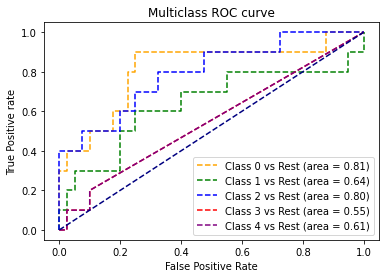

In [102]:
plot_roc(act, prob)
print(act)